In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer 
from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder
#TargetEncoder
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import recall_score, f1_score
from scipy.stats import randint, uniform

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [2]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [3]:
df = pd.read_csv('./data_fin.csv')
data = df.copy()
print(data.shape)
display(data.head())
display(data.tail())

(16082, 28)


,N_WAT_C,NF_CA,NF_CAROT,NF_NA,NF_EN,NF_K,NF_FE,NF_NIAC,NF_PHOS,NF_WATER,NF_RETIN,NF_VITC,NF_VA,NF_tdf,NF_PROT,NF_CHO,NF_FAT,NF_INTK,ID,ID_fam,INQ,year,region,psu,apt_t,edu,occp,target
0,216.0,0.960401,0.230944,2.337226,1.370062,0.917164,1.877722,1.058809,2.409079,0.305745,0.097908,5.508160,0.354512,18.310667,1.464388,0.304241,3.042929,846.981951,A601169401,A6011694,1.482619,2017.0,1.0,A601,1.0,3.0,6.0,0
1,580.0,1.710455,0.905041,5.051336,1.603757,1.811129,2.530722,2.790056,3.203979,0.958680,0.059988,12.743000,1.065589,27.459340,2.409821,0.272842,8.019601,2010.518297,A601177901,A6011779,3.009066,2017.0,1.0,A601,1.0,3.0,6.0,0
2,262.0,0.539781,0.379959,1.596811,0.794880,0.656560,1.215223,1.179154,1.525822,0.223642,0.031507,7.320715,0.453683,13.892026,1.146618,0.141232,3.705286,713.578427,A601177902,A6011779,1.394058,2017.0,1.0,A601,1.0,4.0,7.0,0
3,78.0,4.040762,0.508728,1.735635,1.449521,1.422557,3.624829,2.090990,3.862291,0.382953,0.485026,3.969619,1.050280,27.142239,1.965607,0.279365,5.530943,938.787566,A601208501,A6012085,2.159940,2017.0,1.0,A601,1.0,1.0,7.0,0
4,392.0,1.277202,0.469773,2.196043,0.985183,0.897818,1.435169,0.745430,1.639140,0.373307,0.113140,4.572529,0.635110,19.961437,0.981600,0.229284,1.704557,974.949878,A601208502,A6012085,1.217019,2017.0,1.0,A601,1.0,2.0,6.0,1


,N_WAT_C,NF_CA,NF_CAROT,NF_NA,NF_EN,NF_K,NF_FE,NF_NIAC,NF_PHOS,NF_WATER,NF_RETIN,NF_VITC,NF_VA,NF_tdf,NF_PROT,NF_CHO,NF_FAT,NF_INTK,ID,ID_fam,INQ,year,region,psu,apt_t,edu,occp,target
16077,20.0,0.173314,0.171282,0.374967,0.226292,0.169096,0.180832,0.303029,0.278688,0.204598,0.028096,0.879789,0.123252,12.463533,0.214700,0.041294,1.297601,931.361051,R754375103,R7543751,1.000000,2019.0,8.0,R754,2.0,4.0,1.0,1
16078,156.0,1.338650,0.116484,2.141641,0.698999,0.578162,0.935555,0.300321,1.707720,0.313848,0.175783,3.118740,0.240497,21.410334,0.968944,0.087245,6.081196,885.559535,R754381902,R7543819,1.253586,2019.0,8.0,R754,2.0,4.0,5.0,1
16079,96.0,0.183450,0.512839,0.596777,0.348250,0.283074,0.608649,0.352256,0.665653,0.105461,0.002503,1.833692,0.287413,10.096619,0.520381,0.065610,1.256462,514.176410,R754393801,R7543938,1.000000,2019.0,8.0,R754,2.0,4.0,1.0,1
16080,48.0,0.081698,0.159649,0.284757,0.160438,0.118349,0.242239,0.157205,0.273676,0.039908,0.001190,0.833494,0.089884,5.887290,0.208481,0.032815,0.458900,318.477157,R754393802,R7543938,1.000000,2019.0,8.0,R754,2.0,4.0,7.0,1
16081,80.0,0.112191,0.235820,0.556095,0.200232,0.172747,0.301504,0.176007,0.480141,0.042347,0.003034,0.877424,0.134045,7.008412,0.404234,0.030696,1.006633,326.749441,R754393803,R7543938,1.000000,2019.0,8.0,R754,2.0,2.0,7.0,1


In [4]:
print(data['target'].loc[data['target'] == 1].count(),
      data['target'].loc[data['target'] == 0].count())

6869 9213


In [5]:
#학습에 사용할 특성 빼고 드랍
data.drop(
    columns=[
        'INQ', #data leak
        'year', #시계열
    ],
    inplace=True
)

In [6]:
features = data.drop(columns=['target']).columns

In [7]:
#결측치 확인
[(x, data[x].isnull().sum()) for x in data.columns if data[x].isnull().any()]

[]

In [8]:
#중복값 확인
data.duplicated().sum()

0

In [9]:
from sklearn.model_selection import train_test_split

#train/test 분리 (validation 할까하다가 제외)
#target 비율 설정할지? stratify = y
X_train, X_test, y_train, y_test = train_test_split(data[features], data['target'], test_size=0.2, random_state=1)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25) # 0.25 x 0.8 = 0.2

In [10]:
#이진분류모델

In [13]:
%%time
pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    RandomForestClassifier(n_jobs=-1, random_state=1, oob_score=True)
)

pipe.fit(X_train, y_train)

CPU times: user 3.05 s, sys: 58.7 ms, total: 3.11 s
Wall time: 541 ms


Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['ID', 'ID_fam', 'psu'],
                                mapping=[{'col': 'ID', 'data_type': dtype('O'),
                                          'mapping': A714036102        1
H785330902        2
E753223801        3
A783342801        4
P754186401        5
              ...  
P604169402    12862
C753188101    12863
A609342801    12864
H759371702    12865
NaN              -2
Length: 12866, dtype: int64},
                                         {'col': 'ID_fam',
                                          'data_type': dtype('O'),
                                          'mapping': A7140361       1
H7853309       2
E753...
P7541864       5
            ... 
H6172238    8406
A7582459    8407
A6332476    8408
C7531881    8409
NaN           -2
Length: 8410, dtype: int64},
                                         {'col': 'psu', 'data_type': dtype('O'),
                                          'mapping': A714      1
H785 

In [14]:
print('검증 정확도: ', pipe.score(X_test, y_test))

검증 정확도:  0.9776188995958968


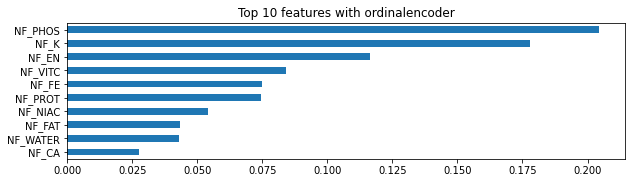

In [15]:


n = 10

# 특성 중요도
rf = pipe.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)

plt.figure(figsize=(10,n/4))
plt.title(f'Top {n} features with ordinalencoder')
importances.sort_values()[-n:].plot.barh();

### 3대 영양소로 모델

In [30]:
data = df.copy()

In [31]:
#학습에 사용할 특성 빼고 드랍
features = data.drop(columns=['NF_PROT','NF_CHO','NF_FAT','region', 'psu', 'apt_t', 'edu', 'occp', 'target']).columns
data.drop(
    columns=features,
    inplace=True
)
data.columns

Index(['NF_PROT', 'NF_CHO', 'NF_FAT', 'region', 'psu', 'apt_t', 'edu', 'occp',
       'target'],
      dtype='object')

In [32]:
features = data.drop(columns=['target']).columns
X_train, X_test, y_train, y_test = train_test_split(data[features], data['target'], test_size=0.2, random_state=1)

In [33]:
%%time
pipe_d = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    RandomForestClassifier(n_jobs=-1, random_state=1, oob_score=True)
)

pipe_d.fit(X_train, y_train)

CPU times: user 1.05 s, sys: 81.7 ms, total: 1.13 s
Wall time: 297 ms


Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['psu'],
                                mapping=[{'col': 'psu', 'data_type': dtype('O'),
                                          'mapping': A714      1
H785      2
E753      3
A783      4
P754      5
       ... 
A735    573
R751    574
J751    575
H754    576
NaN      -2
Length: 577, dtype: int64}])),
                ('simpleimputer', SimpleImputer()),
                ('randomforestclassifier',
                 RandomForestClassifier(n_jobs=-1, oob_score=True,
                                        random_state=1))])

In [34]:
print('검증 정확도: ', pipe_d.score(X_test, y_test))

검증 정확도:  0.9123406900839292


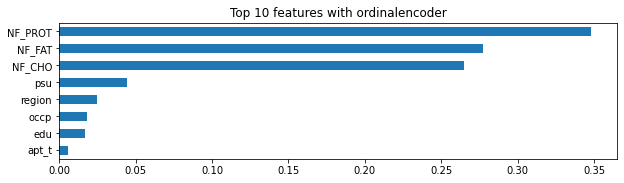

In [35]:
import matplotlib.pyplot as plt

n = 10

# 특성 중요도
rf = pipe_d.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)

plt.figure(figsize=(10,n/4))
plt.title(f'Top {n} features with ordinalencoder')
importances.sort_values()[-n:].plot.barh();

# lekage 의심으로 피쳐 다 날리고 다시 시도

##### 학습에 사용할 특성 빼고 드랍

In [39]:
del data

In [40]:
data = df.copy()

features = data.drop(columns=['region', 'psu', 'apt_t', 'edu', 'occp', 'target']).columns
data.drop(
    columns=features,
    inplace=True
)
data.columns

Index(['region', 'psu', 'apt_t', 'edu', 'occp', 'target'], dtype='object')

In [41]:
features = data.drop(columns=['target']).columns
X_train, X_test, y_train, y_test = train_test_split(data[features], data['target'], test_size=0.2, random_state=1)

In [42]:
%%time
pipe_a = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    RandomForestClassifier(n_jobs=-1, random_state=1, oob_score=True)
)

pipe_a.fit(X_train, y_train)

CPU times: user 944 ms, sys: 70.1 ms, total: 1.01 s
Wall time: 318 ms


Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['psu'],
                                mapping=[{'col': 'psu', 'data_type': dtype('O'),
                                          'mapping': A714      1
H785      2
E753      3
A783      4
P754      5
       ... 
A735    573
R751    574
J751    575
H754    576
NaN      -2
Length: 577, dtype: int64}])),
                ('simpleimputer', SimpleImputer()),
                ('randomforestclassifier',
                 RandomForestClassifier(n_jobs=-1, oob_score=True,
                                        random_state=1))])

In [43]:
print('검증 정확도: ', pipe_a.score(X_test, y_test))

검증 정확도:  0.6319552377991918


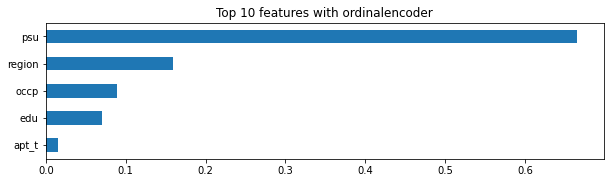

In [44]:
import matplotlib.pyplot as plt

n = 10

# 특성 중요도
rf = pipe_a.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)

plt.figure(figsize=(10,n/4))
plt.title(f'Top {n} features with ordinalencoder')
importances.sort_values()[-n:].plot.barh();

##### 기준모델 검증 정확도 0.63

In [45]:
pipe_b = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(), 
    RandomForestClassifier(random_state=1)
)

dists = {
    'simpleimputer__strategy': ['mean', 'median', 'most_frequent'], #평균값 중앙값 최빈값
    'randomforestclassifier__n_estimators': randint(50, 500), #의사결정 나무 갯수 
    'randomforestclassifier__max_depth': [5, 10, 20, 30, 40, 50, None], #깊이
    'randomforestclassifier__max_features': uniform(0, 1) 
}

cv_k=10

clf = RandomizedSearchCV(
    pipe_b, 
    param_distributions=dists, 
    n_iter=50,
    cv=cv_k,
    scoring='neg_mean_absolute_error',  
    verbose=1,
    n_jobs=-1
)

In [46]:
%%time
clf.fit(X_train, y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
CPU times: user 2.39 s, sys: 457 ms, total: 2.84 s
Wall time: 2min 24s


RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('ordinalencoder',
                                              OrdinalEncoder()),
                                             ('simpleimputer', SimpleImputer()),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(random_state=1))]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'randomforestclassifier__max_depth': [5,
                                                                              10,
                                                                              15,
                                                                              20,
                                                                              None],
                                        'randomforestclassifier__max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1663f8610>,
 

In [47]:
print('최적 하이퍼파라미터: ', clf.best_params_)
print('MAE: ', -clf.best_score_)

최적 하이퍼파라미터:  {'randomforestclassifier__max_depth': 15, 'randomforestclassifier__max_features': 0.8115935261540629, 'randomforestclassifier__n_estimators': 92, 'simpleimputer__strategy': 'mean'}
MAE:  0.36416636758782944


In [48]:
#각 하이퍼파라미터 조합으로 만들어진 모델들을 순위별로 나열
pd.DataFrame(clf.cv_results_).sort_values(by='rank_test_score').T

,10,36,20,34,43,47,29,6,27,41,46,39,40,35,49,42,7,25,8,0,9,33,45,44,30,26,17,37,13,21,48,28,12,14,16,31,24,23,11,22,15,18,3,38,19,1,2,5,4,32
mean_fit_time,1.176405,3.84128,2.186582,1.375285,4.981364,3.326336,1.180214,2.372735,5.815417,2.660631,0.729141,0.743402,6.79087,0.867374,2.012703,5.815923,1.489779,1.309207,1.825728,0.63195,1.627503,1.951321,1.984604,1.058682,2.154387,2.078034,0.866559,2.3068,2.568672,1.619127,2.282337,4.585804,1.14366,2.491641,1.569011,0.437073,4.127584,0.718107,2.545909,2.464948,3.208468,2.957748,0.344717,1.830331,1.612319,0.170465,2.050778,0.357387,1.77526,1.927214
std_fit_time,0.054565,0.135195,0.042988,0.040107,0.162163,0.051774,0.043038,0.02923,0.035766,0.144298,0.028987,0.0177,0.230062,0.016826,0.143893,0.068131,0.031671,0.056577,0.024861,0.015807,0.038214,0.077581,0.071674,0.013622,0.045419,0.035067,0.016336,0.072011,0.043764,0.049872,0.080906,0.098025,0.052246,0.041442,0.035228,0.019511,0.05778,0.015759,0.057396,0.038557,0.035569,0.056327,0.020475,0.04451,0.058335,0.003441,0.101177,0.020683,0.041362,0.069221
mean_score_time,0.028422,0.110977,0.059161,0.068074,0.142304,0.088096,0.063541,0.11953,0.21971,0.11714,0.037467,0.034401,0.230705,0.038498,0.072497,0.2338,0.049983,0.072563,0.093912,0.018224,0.070358,0.062332,0.106289,0.054698,0.11365,0.084467,0.047934,0.053112,0.111258,0.064631,0.100079,0.207889,0.038028,0.048561,0.042383,0.018697,0.090905,0.03761,0.06717,0.082284,0.064165,0.110824,0.018981,0.07012,0.067006,0.00714,0.049388,0.00948,0.048205,0.04833
std_score_time,0.005383,0.003617,0.010763,0.004853,0.026121,0.005229,0.010137,0.010815,0.02726,0.013144,0.006615,0.00354,0.019131,0.001433,0.016639,0.045816,0.003892,0.008143,0.012191,0.004293,0.003912,0.009563,0.016538,0.006277,0.015463,0.008859,0.004142,0.008057,0.012262,0.006416,0.016705,0.021013,0.005556,0.003741,0.004892,0.003132,0.011412,0.004194,0.010244,0.005632,0.006351,0.021107,0.007975,0.004545,0.009301,0.001237,0.008947,0.002759,0.005462,0.006602
param_randomforestclassifier__max_depth,15,15,None,15,None,None,15,15,20,10,15,10,None,10,15,None,None,20,20,10,10,None,None,None,None,None,20,10,20,None,None,None,10,10,10,10,10,None,10,10,10,10,5,5,5,5,5,5,5,5
param_randomforestclassifier__max_features,0.811594,0.650145,0.938656,0.3441,0.934684,0.976954,0.166002,0.310577,0.762645,0.109829,0.384831,0.135811,0.854073,0.048676,0.595069,0.660122,0.700169,0.202913,0.197937,0.865087,0.356159,0.709864,0.029295,0.026616,0.058275,0.531069,0.154472,0.897012,0.56145,0.4896,0.419194,0.464559,0.48886,0.823921,0.693109,0.45774,0.885556,0.224766,0.783192,0.58735,0.95537,0.469415,0.022994,0.29024,0.295536,0.360185,0.967912,0.649294,0.712077,0.653168
param_randomforestclassifier__n_estimators,92,364,154,202,302,212,160,381,475,463,95,139,443,165,231,421,134,174,265,71,323,159,226,127,261,218,125,208,304,176,229,456,182,265,206,63,404,94,311,386,342,487,96,483,462,56,362,69,345,294
param_simpleimputer__strategy,mean,most_frequent,median,most_frequent,most_frequent,median,most_frequent,mean,median,most_frequent,median,most_frequent,mean,median,median,mean,mean,median,most_frequent,mean,mean,median,most_frequent,median,median,mean,most_frequent,mean,most_frequent,mean,median,mean,mean,most_frequent,mean,median,mean,most_frequent,mean,mean,mean,most_frequent,most_frequent,median,mean,most_frequent,mean,median,most_frequent,most_frequent
params,"{'randomforestclassifier__max_depth': 15, 'ran...","{'randomforestclassifier__max_depth': 15, 'ran...","{'randomforestclassifier__max_depth': None, 'r...","{'randomforestclassifier__max_depth': 15, 'ran...","{'randomforestclassifier__max_depth': None, 'r...","{'randomforestclassifier__max_depth': None, 'r...","{'randomforestclassifier__max_depth': 15, 'ran...","{'randomforestclassifier__max_depth': 15, 'ran...","{'randomforestclassifier__max_depth': 20, 'ran...","{'randomforestclassifier__max_depth': 10, 'ran...","{'randomforestclassifier__max_depth': 15, 'ran...","{'randomforestclassifier__max_depth': 10, 'ran...","{'ra

In [81]:
pipe_b = clf.best_estimator_
scores = cross_validate(pipe_b, X_train, y_train, cv=cv_k, scoring='f1_macro') 

print(f"F1 Score : {scores['test_score'].mean()}")

F1 Score : 0.6174973737427065


In [79]:
y_pred = pipe_b.predict(X_test)

In [80]:
print('검증 정확도: ', pipe_b.score(X_test, y_test))

검증 정확도:  0.6540254895865714


- cv = 5 / score : 0.633
- cv = 10 / score : 0.654
- cv = 30 / score : 0.655

In [82]:
print('accuracy_score',accuracy_score(y_test, y_pred))
print('recall_score',recall_score(y_test, y_pred))
print('precision_score',precision_score(y_test, y_pred))
print('f1_score',f1_score(y_test, y_pred))

accuracy_score 0.6540254895865714
recall_score 0.505407354001442
precision_score 0.6214539007092199
f1_score 0.5574552683896621


In [77]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.77      0.72      1830
           1       0.62      0.51      0.56      1387

    accuracy                           0.65      3217
   macro avg       0.65      0.64      0.64      3217
weighted avg       0.65      0.65      0.65      3217



/Users/jacob/miniforge3/envs/tf25/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


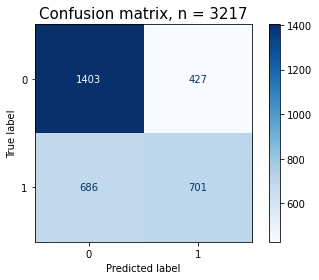

In [84]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
pcm = plot_confusion_matrix(pipe_b, X_test, y_test,
                            cmap=plt.cm.Blues,
                            ax=ax);
plt.title(f'Confusion matrix, n = {len(y_test)}', fontsize=15)
plt.show()

In [75]:
from category_encoders import OneHotEncoder
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# (참고) warning 제거를 위한 코드
np.seterr(divide='ignore', invalid='ignore')

pipe = make_pipeline(
    OneHotEncoder(use_cat_names=True), 
    SimpleImputer(strategy='mean'), 
    StandardScaler(), 
    SelectKBest(f_regression, k=20),
    Ridge(alpha=1.0)
)

# 3-fold 교차검증을 수행합니다.
k = 10
scores = cross_val_score(pipe, X_train, y_train, cv=k, 
                         scoring='neg_mean_absolute_error')

print(f'MAE ({k} folds):', -scores)

MAE (10 folds): [0.45630551 0.46511398 0.46810567 0.46126064 0.46339669 0.45973641
 0.46237932 0.46576414 0.45789739 0.46530315]


In [ ]:
#잘 만들어진다면 학교 또는 동사무소, 유니세프 등에서 사용할 수 있을 것